In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
import seaborn as sns

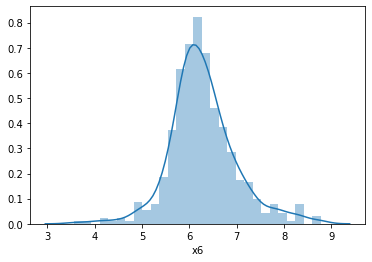

In [7]:
sns.distplot(df['x6'])

In [8]:
col = 'x6'

In [11]:
mean = df.mean()
#mean

In [12]:
mean[col]

6.284634387351788

In [14]:
sigma = df.std()
#sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [15]:
sigma[col]

0.7026171434153234

In [22]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [23]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [25]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [26]:
len(df)

506

In [27]:
len(df2)

498

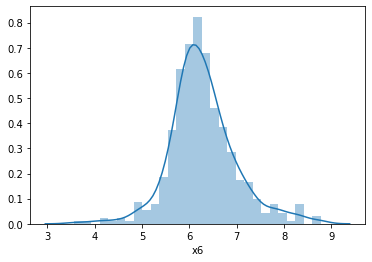

In [28]:
sns.distplot(df[col])

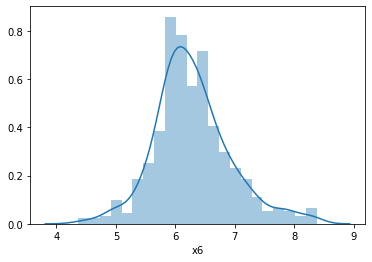

In [29]:
sns.distplot(df2[col])

In [32]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [33]:
_df = df
for col in cols:
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [34]:
len(df)

506

In [35]:
len(_df)

415

In [36]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [37]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
model.score(X_train, y_train)

0.7972109224535133

In [52]:
model.score(X_test, y_test)

0.6253776004329594

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
model.score(X_train2, y_train)

0.7972109224535133

In [64]:
model.score(X_test2, y_test)

0.6253776004329598

In [69]:
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

In [68]:
np.set_printoptions(precision=2, suppress=True)

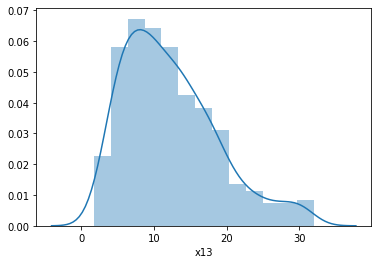

In [73]:
sns.distplot(_df['x13'])